# **MAS473 Programming Recitation (Week 7)**

## **Contents**

We will cover

- **Logistic Regression**
- **Linear Support Vector Machine**
- **Kernelized Support Vector Machine**

## **1. Logistic Regression**
### **(1) Binary Classification**
First, import some required libraries. We start with a simple 2-D binary
classification problem by using a logistic regression. 

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

The followings are our
synthetic data.

In [ ]:
training_datas, training_targets = make_blobs(n_samples = 40, centers = 2, n_features = 2, random_state = 9)

In [ ]:
print(training_datas)
print(training_targets)

[[ -9.87510466   2.4926745 ]
 [ -1.89337463  -6.98365827]
 [ -0.57828095  -7.69950711]
 [-10.17087839  -0.44364352]
 [ -9.11724575   0.06944996]
 [ -8.48870648   1.42689258]
 [ -8.66205567   1.07988929]
 [  0.6848143   -8.22241431]
 [  0.3128947   -5.6637058 ]
 [-10.29074169  -2.05428493]
 [ -0.78644983  -9.29768045]
 [ -0.1072639   -8.2834065 ]
 [ -7.96970116   0.46826087]
 [ -1.29537288  -7.8268148 ]
 [ -0.72326389  -6.49863909]
 [ -0.46034718  -8.246471  ]
 [  0.57932092  -6.57392847]
 [ -0.0490346   -6.47518826]
 [ -0.74072072  -7.98511613]
 [-10.01983128   0.30680722]
 [ -0.55035251  -7.60084869]
 [ -8.2497873   -0.86322933]
 [ -9.58373992   0.36590292]
 [-12.46462693  -0.87578744]
 [  1.60910378  -9.02074466]
 [ -0.46764856  -7.21387943]
 [-11.3098481   -0.45338014]
 [ -2.87790434  -7.54956007]
 [ -9.27614944  -0.31774762]
 [ -0.25427391  -4.9063031 ]
 [-10.4489695   -0.01876545]
 [ -9.4958347    0.7449955 ]
 [ -9.15662584   1.77760915]
 [ -8.87437103   0.41800131]
 [ -9.92964193

For visualization, we divide our training data by their class.

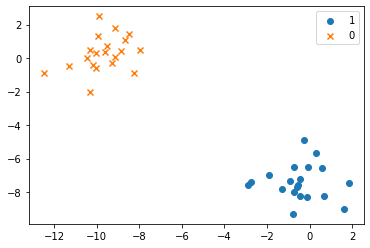

In [ ]:
positive_index = np.where(training_targets == 1)
negative_index = np.where(training_targets == 0)
positive_data = training_datas[positive_index]
negative_data = training_datas[negative_index]

positive_data_x_axis = positive_data[:, 0]
positive_data_y_axis = positive_data[:, 1]
negative_data_x_axis = negative_data[:, 0]
negative_data_y_axis = negative_data[:, 1]

plt.scatter(positive_data_x_axis, positive_data_y_axis, marker = 'o', label = '1')
plt.scatter(negative_data_x_axis, negative_data_y_axis, marker = 'x', label = '0')
plt.legend()

Now, build a logistic regression model and learn the model by using 'fit' method. 

In this problem, our objective is to find a nice decision boundary using
the estimated assign probability.

In [ ]:
from sklearn.linear_model import LogisticRegression
synthetic_log_reg = LogisticRegression()
synthetic_log_reg.fit(training_datas, training_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

To do this, we test our trained model at 10000 regularly spaced points in
$[−12, 2] × [−8, 4]$. 

Note that 'np.meshgrid' is usually used to make 2d grid points.

In [ ]:
points = 100
xaxis, yaxis = np.meshgrid(np.linspace(-12, 2, points), np.linspace(-8, 4, points))
domain = np.vstack([xaxis.ravel(), yaxis.ravel()]).T

test_prob = synthetic_log_reg.predict_proba(domain)[:,1]
test_prob = test_prob.reshape((points, points))

Now, draw a contour line whose assign probability of +1 is 0.666, 0.5, and
0.334. Here, those assign probabilities come from our trained model.

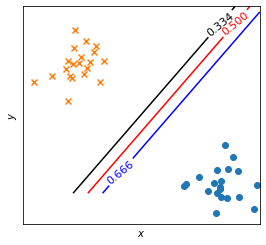

In [ ]:
fig = plt.figure(1)
ax = fig.gca()
ax.axes.set_aspect('equal')

plt.xticks([])
plt.yticks([])

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.scatter(positive_data_x_axis, positive_data_y_axis, marker = 'o', label = '1')
plt.scatter(negative_data_x_axis, negative_data_y_axis, marker = 'x', label = '0')

cs = plt.contour(xaxis, yaxis, test_prob, [0.666], colors='b', linestyles = 'solid')
plt.clabel(cs, fontsize=11)
cs = plt.contour(xaxis, yaxis, test_prob, [0.5], colors='r', linestyles = 'solid')
plt.clabel(cs, fontsize=11)
cs = plt.contour(xaxis, yaxis, test_prob, [0.334], colors='black', linestyles = 'solid')
plt.clabel(cs, fontsize=11)

plt.show()

Note that all contours are linear. For example, the blue contour is a set of
point $(x, y)$ satisfying
<center>$\log(\frac{0.666}{1-0.666}) = \mathbf{w}^\top(x, y) = \mathbf{w}_1x + \mathbf{w}_2 y$</center> 

where $\mathbf{w}$ is a parameter of our learned model.

We use another dataset, Iris dataset which is a real data. It is composed with 150 data of three types of iris. Each data has 4 features, width and length of petal and sepal.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


Build a binary classifier which classifies whether a iris data is Virginica or
not using only a width of petal.

In [ ]:
X = iris["data"][:, 3:] # The width of petal
y = (iris["target"]==2).astype(np.int)

In [ ]:
print(X) # It should be 2D array
print(y)

Now, learn our logistic regression model. The following figure is the result of estimated assign probabilities of data whose width of petal is smaller than 4cm.

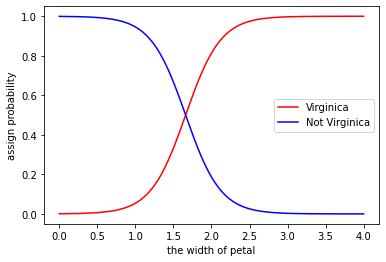

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

domain = np.linspace(0, 4, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(domain)

plt.plot(domain, y_prob[:,1], "r-", label = "Virginica")
plt.plot(domain, y_prob[:,0], "b-", label = "Not Virginica")

plt.xlabel('the width of petal')
plt.ylabel('assign probability')
plt.legend()
plt.show()

### **(2) Multi-Class Classification**

Next, we consider a multi-class classification. We use iris data. In this case, use two features : the width and length of petal.



In [ ]:
X = iris["data"][:,(2,3)]
y = iris["target"]

setosa = []
versicolor = []
virginica = []

for i in range(len(y)):
  if y[i] == 0:
    setosa.append(i)
  elif y[i] == 1:
    versicolor.append(i)
  else:
    virginica.append(i)

In [ ]:
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10) # C is a parameter for ridge regularization
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

As we use 2 features, we again use np.meshgrid to generate 2D grid points.

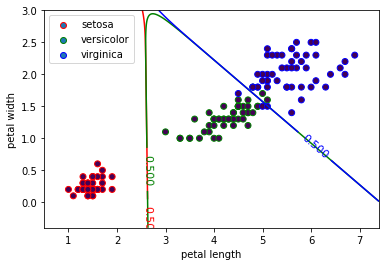

In [ ]:
petal_length = np.linspace(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, 500)
petal_width = np.linspace(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, 500)
length, width = np.meshgrid(petal_length, petal_width)
domain = np.vstack([length.ravel(), width.ravel()]).T

z = softmax_reg.predict_proba(domain)
prob1 = z[:,0].reshape((500, 500))
prob2 = z[:,1].reshape((500, 500))
prob3 = z[:,2].reshape((500, 500))

plt.scatter(X[setosa, 0], X[setosa, 1], c = y[setosa], edgecolors = 'r', label='setosa')
cs = plt.contour(length, width, prob1, [0.5], colors = 'r', linestyles = 'solid')
plt.clabel(cs, fontsize = 11)
plt.scatter(X[versicolor, 0], X[versicolor, 1], c = y[versicolor], edgecolors = 'g', label='versicolor')
cs = plt.contour(length, width, prob2, [0.5], colors = 'g', linestyles = 'solid')
plt.clabel(cs, fontsize = 11)
plt.scatter(X[virginica, 0], X[virginica, 1], c = y[virginica], edgecolors = 'b', label='virginica')
cs = plt.contour(length, width, prob3, [0.5], colors = 'b', linestyles = 'solid')
plt.clabel(cs, fontsize = 11)

plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

For example, the red contour is a set of points $(x, y)$ satisfying

##### <center> $0.5 = P(y=setosa) = \frac{\exp(\mathbf{w}_{setosa}^\top(x, y))}{\sum_k \exp(\mathbf{w}_k^\top(x, y))}$ </center>

Here $(x, y)$ is a value of (petal width, petal length).

## **2. Linear Support Vector Machine**
First, consider a classification problem in 2D space. Here, the goal is to find a linear decision boundary. 

You can download data on KLMS or https://github.com/AlfTang/Spam-Classifier.

Then upload the data file to your Google drive.

First, we mount our Google drive. Then '/content/drive/MyDrive' is the home directory of our Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


loadmat is the function which loads a Matlab data into a dictionary.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

raw_data = loadmat('/content/drive/MyDrive/ex6data1.mat')

To deal with this data, we transform the above raw data into a dataframe using a
panads library. Key ’y’ contains labels for each point. The following is a visualization of
our data.

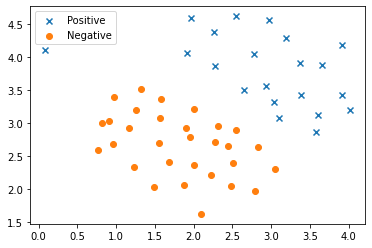

In [ ]:
data = pd.DataFrame(raw_data['X'], columns = ['X', 'Y'])
data['label'] = raw_data['y']

positive = data[data['label'].isin([1])]
negative = data[data['label'].isin([0])]

plt.scatter(positive['X'], positive['Y'], marker = 'x', label = 'Positive')
plt.scatter(negative['X'], negative['Y'], marker = 'o', label = 'Negative')
plt.legend()
plt.show()

Because of the ourlier in positive data, our data is not linearly separable. However, support vector machine model in scikit-learn is already based on a soft magin, which is a generalized version of hard margin SVM.

Now, build a soft margin svm model and train the model as follow. Here, C determines the amount of regularization. If a model is overfitted, it can be regularized by modifying C.

Model.score gives the accuracy of our trained model on training data. Our model
mis-classifies one data.

In [ ]:
from sklearn import svm

svc2 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc2.fit(data[['X', 'Y']], data['label'])
svc2.score(data[['X', 'Y']], data['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

To check the result, draw the decision boundary and classified points.

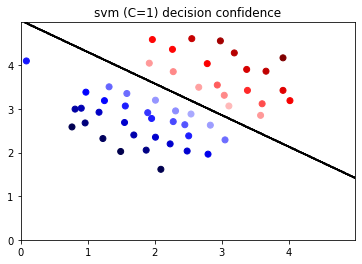

In [ ]:
data['svm confidence'] = svc2.decision_function(data[['X', 'Y']])
x, y = np.meshgrid(np.arange(0, 5, 0.01), np.arange(0, 5, 0.01))

Z = svc2.predict(np.c_[x.ravel(), y.ravel()])
Z = Z.reshape(x.shape)

plt.scatter(data['X'], data['Y'], c = data['svm confidence'], cmap = 'seismic')
plt.contour(x, y, Z, colors = 'black')
plt.title('svm (C=1) decision confidence')
plt.show()

Now, let’s consider a data which is highly non-linear. The first one is a moon-shaped data which was discussed in decision-tree lectures.

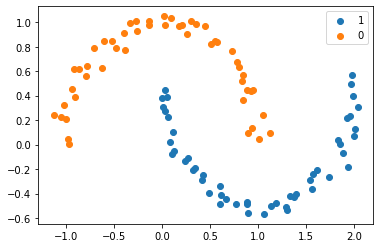

In [ ]:
from sklearn.datasets import make_moons
X1, label1 = make_moons(n_samples = 100, noise = 0.05, random_state = 10)

data1 = pd.DataFrame(X1, columns = ['X', 'Y'])
data1['label'] = np.array(label1)

one = data1[data1['label'].isin([1])]
zero = data1[data1['label'].isin([0])]

plt.scatter(one['X'], one['Y'], label = '1')
plt.scatter(zero['X'], zero['Y'], label = '0')
plt.legend()
plt.show()

Like a polynomial regression, linear SVM using polynomial features maybe work well. On the other hand, we need some pre-processing to get polynomial features of the above data. To do this, we use the Pipeline, which is used for consecutive transformation.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_svm = Pipeline([("poly_features", PolynomialFeatures(degree = 3)), ('svm_clf', svm.LinearSVC(C = 10, loss = 'hinge'))])

By a similar process, we can get the following results.

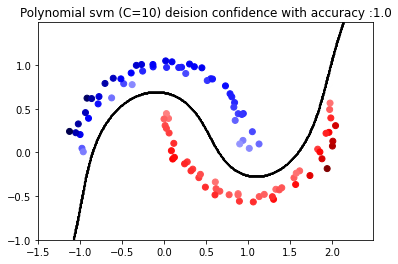

In [ ]:
x, y = np.meshgrid(np.arange(-1.5, 2.5, 0.01), np.arange(-1, 1.5, 0.01))
polynomial_svm.fit(data1[['X', 'Y']], data1['label'])

data1['polynomial svm confidence'] = polynomial_svm.decision_function(data1[['X', 'Y']])
score = polynomial_svm.score(data1[['X', 'Y']], data1['label'])

Z = polynomial_svm.predict(np.c_[x.ravel(), y.ravel()])
Z = Z.reshape(x.shape)

plt.scatter(data1['X'], data1['Y'], c = data1['polynomial svm confidence'], cmap = 'seismic')
plt.contour(x, y, Z, colors = 'black')
plt.title('Polynomial svm (C=10) deision confidence with accuracy :'+ str(score))
plt.show()

## **3. Kernelized Support Vector Machine**
However, adding additional features make the model slow. Fortunately in SVM, there is a kernel trick which doesn't need adding other additional features. It can be easily implemented by using a method 'SVC.
Now, classify the previous data using kernelized svm with a polynomial kernel
<center> $K(\mathbf{x},\mathbf{z}) = \beta_0(\mathbf{x}^\top\mathbf{z})^3$ </center>

where $\beta_0$ is a constant parameter which will be determined in code as follow.

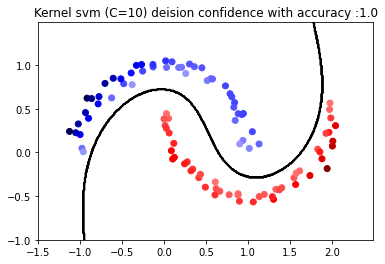

In [ ]:
from sklearn.svm import SVC

kern_svm = SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 10) # degree is the degree of polynomial feature and coef0 is beta0
kern_svm.fit(data1[['X', 'Y']], data1['label'])

data1['kernel svm confidence'] = kern_svm.decision_function(data1[['X', 'Y']])
score = kern_svm.score(data1[['X', 'Y']], data1['label'])

Z = kern_svm.predict(np.c_[x.ravel(), y.ravel()])
Z = Z.reshape(x.shape)

plt.scatter(data1['X'], data1['Y'], c = data1['kernel svm confidence'], cmap = 'seismic')
plt.contour(x, y, Z, colors = 'black')
plt.title('Kernel svm (C=10) deision confidence with accuracy :'+ str(score))
plt.show()

There is a well known kernel called as the radial basis function (RBF)
<center> $K(\mathbf{x},\mathbf{z}) = \beta_0\exp\left(-\frac{1}{2\gamma^2}\|\mathbf{x}-\mathbf{z}\|^2\right)$ </center>

It is more widely used than a polynomial kernel. RBF also has one special parameter $\gamma$, which is called as the length scale. It determines
a sensitivity of features of training data. For a soft margin kernelized svm using the RBF, choosing proper $\gamma$ and $C$ is very important. 

Consider the following classification problem.

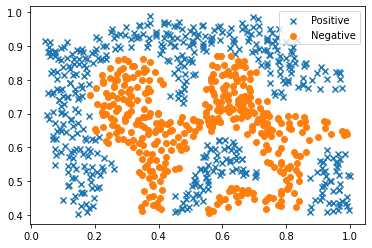

In [ ]:
exercise = loadmat('/content/drive/MyDrive/ex6data2.mat')

data = pd.DataFrame(exercise['X'], columns = ['X', 'Y'])
data['label'] = exercise['y']

positive = data[data['label'].isin([1])]
negative = data[data['label'].isin([0])]

plt.scatter(positive['X'], positive['Y'], marker = 'x', label = 'Positive')
plt.scatter(negative['X'], negative['Y'], marker = 'o', label = 'Negative')
plt.legend()
plt.show()

Now, we will compare the four classification results which use the RBF kernel with hyperparameters $(\gamma, C) = (1, 1), (1, 100), (10, 1), (10, 100)$. In this example, we can check that setting proper hyper parameter is very important for a kernelized model.

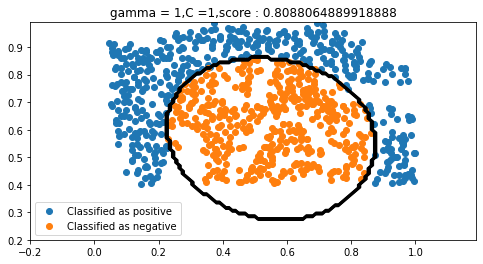

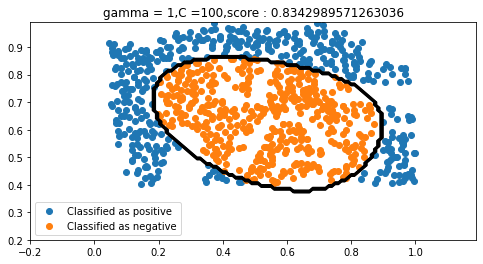

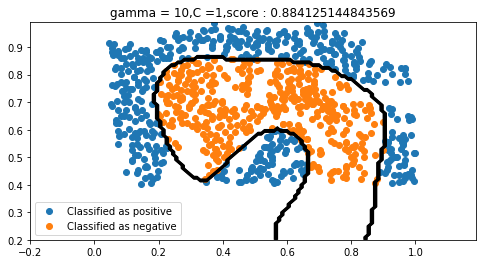

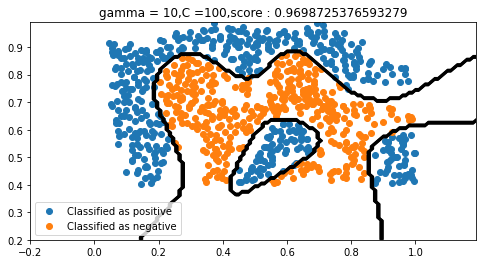

In [ ]:
gamma = [1, 10]
regularizer = [1, 100]
x, y = np.meshgrid(np.arange(-0.2, 1.2, 0.01), np.arange(0.2, 1, 0.01))

for gamma_ in gamma:
  for C in regularizer:
    rbf_svm = SVC(kernel = 'rbf', coef0 = 1, gamma = gamma_, C = C)
    rbf_svm.fit(data[['X', 'Y']], data['label'])

    data['rbf svm confidence'] = rbf_svm.predict(data[['X', 'Y']])
    score = rbf_svm.score(data[['X', 'Y']], data['label'])

    Z = rbf_svm.predict(np.c_[x.ravel(), y.ravel()])
    Z = Z.reshape(x.shape)

    index0 = np.where(data['rbf svm confidence'] == 0)
    index1 = np.where(data['rbf svm confidence'] == 1)

    plt.figure(figsize = (8, 4))
    plt.scatter(np.array(data['X'])[index1], np.array(data['Y'])[index1], label = 'Classified as positive')
    plt.scatter(np.array(data['X'])[index0], np.array(data['Y'])[index0], label = 'Classified as negative')
    plt.legend()
    plt.contour(x, y, Z, colors = 'black')
    plt.title('gamma = ' + str(gamma_) + ',' + 'C =' + str(C) + ',' + 'score : ' + str(score))

### **References**
#### [1] A. Geron. Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow (2nd), O' Reilly (2019).
(번역본 : 핸즈온 머신러닝 2판)
